<a href="https://colab.research.google.com/github/tommy539/Data-Science-Project/blob/master/Handwritten%20Digit%20Recognition%20II%20-%20Neural%20Network%20Model/Handwritten_Digit_Recognition_II_Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition II - Neural Network Model
In the first part of the handwritten digit recognition, I have used several 'shallow' learning - logistic regression, SVM, random forest and K-nearest neighbour to read the handwritten digits. The best result was 97% given by K-nearest neighbour model with almost 2 hours running time.

Although KNN gives a great result on the digit prediction, it requires a long running time to read the digits. It is due to the mechanism of KNN where for every data (digit), it has to compare with all the data existing in the dataset to find out the nearest k neighbours. It will take a long running time especially when the dataset is huge.

In this project, I would further investigate the method to read handwritten digits in deep learning - Convolutional Neural Network.

## Convolutional Neural Network 
Convolutional Neural Network (CNN) is one type of neural network models. It is proven strong to deal with image recognition and classification. It expects input in the form of the matrix, therefore images are suitable in this case. It firstly zooms the images into a smaller level - we called this step Convolution. Between each zooming, some actions can be done to extract features from the sub-images during each zooming - this is called Pooling. Hence, these zoomed sub-images are then connected to form a neural network to perform the optimization to find the best parameters to predict/ classify the images. The following picture illustrates the basic idea of Convolutional Neural Network model. 
![CNN illustration](http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png)



# Library Import

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import os

In [0]:
from keras.datasets import mnist # data import
from keras.utils import np_utils # data preprocessing

# NN model setup
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D

# Data Loading and preprocessing
Keras library also contains the mnist handwritten digits dataset so we can easily import by keras.

In [0]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [51]:
print (X_train.shape)
print (X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The data in Keras library contains 70000 digits with labels of digits that they are represented.

Let's have a look of some of the digits.

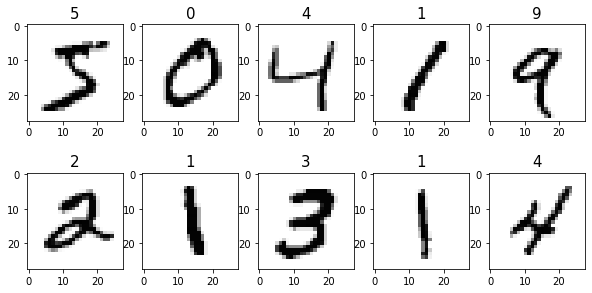

In [22]:
plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(zip(X_train[0:10], y_train[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='Greys')
    plt.title('%i' % label, fontsize = 15)

Before starting the CNN model, the dataset needs to be restructured for the model. They will be reshaped in from (28x28) to (28x28x1) where one is representing the greyscale of their colour.

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [24]:
print (X_train.shape)

(60000, 28, 28, 1)


The images are represented by 28x28 pixels with values of 0 to 255 to represent the colour of each of the pixel.

The value ranging from 0 to 255 will also be rescaled into 0 to 1 by dividing by 255 - we called this Pixel Normalization. This move lowers the value size in our data and it can prevent the huge number driving the model away and also reduce the impact of noise.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Let's have a look at the target labels.

In [52]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

For the target labels, they are represented by numbers from 0-9. However, in the CNN model, we expect the target variable in the form of matrix. In this case, each numerical value should be represented by a matrix with a length of 10. For example, [1,0,0,0,0,0,0,0,0,0] represents 0 and [0,0,0,1,0,0,0,0,0,0] represents 3.

Therefore, it will be transformed by using the utility function np_utils from keras library.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [28]:
print(Y_train.shape)

(60000, 10)


Okay, so now everything is ready for the Convolutional Neural Network model.

# Build the Convolutional Neural Network model
From the experience of previous shallow learning, the handwritten digits can be easily read with high accuracy. Therefore, it is reasonable to suggest that CNN would not require a highly complicated network.

To illustrate the CNN model, I will use a 3-layer CNN model.


In [0]:
# CNN for graphic data
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
%%time
# training the model and saving metrics in history
cnn = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 141s - loss: 0.1646 - accuracy: 0.9515 - val_loss: 0.0682 - val_accuracy: 0.9805
Epoch 2/10
 - 140s - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0505 - val_accuracy: 0.9821
Epoch 3/10
 - 139s - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0446 - val_accuracy: 0.9859
Epoch 4/10
 - 139s - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0411 - val_accuracy: 0.9862
Epoch 5/10
 - 137s - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0501 - val_accuracy: 0.9848
Epoch 6/10
 - 135s - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0486 - val_accuracy: 0.9860
Epoch 7/10
 - 133s - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0489 - val_accuracy: 0.9862
Epoch 8/10
 - 132s - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0519 - val_accuracy: 0.9852
Epoch 9/10
 - 133s - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0531 - val_accuracy: 0.9858
Epoch 10/10
 - 133s - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0554 - val_accuracy: 0.9872

With around 45 mins training time, the Convolutional Neural Network model gives 98.7% on validation data. The graph below also shows the accuracy and loss during the model training.

In [39]:
# saving the model
save_dir = "/"
model_name = 'cnn_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /cnn_mnist.h5 


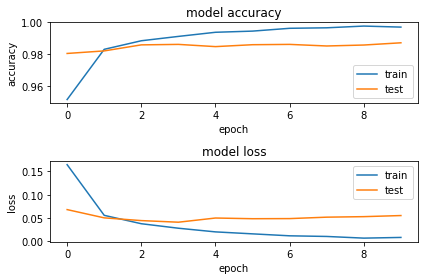

In [40]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

So now, we can use this trained CNN model to test our data. It takes around 8 seconds to read through 10000 digits with 98.7% accuracy!

In [0]:
# define a function to evaluate the predicting accuracy
def accuracy(a,b):
    return sum(a==b)/len(a)

In [43]:
%%time
#predict the images in the test set
cnn_predict = model.predict(X_test)

CPU times: user 7.66 s, sys: 122 ms, total: 7.78 s
Wall time: 4.27 s


In [0]:
digit = np.array([0,1,2,3,4,5,6,7,8,9])
cnn_predict = np.dot(cnn_predict.round() , digit)

In [45]:
accuracy(cnn_predict,y_test)

0.9867

In [0]:
wrong_x = X_test[cnn_predict != y_test]
wrong_y = cnn_predict[cnn_predict!= y_test]
correct_y = y_test[cnn_predict != y_test]

In [47]:
len(wrong_y)

133

There are 133 among 10000 testing data are classified into wrong classes. Let's take a look of those wrongly classified images and see if they are reasonable.

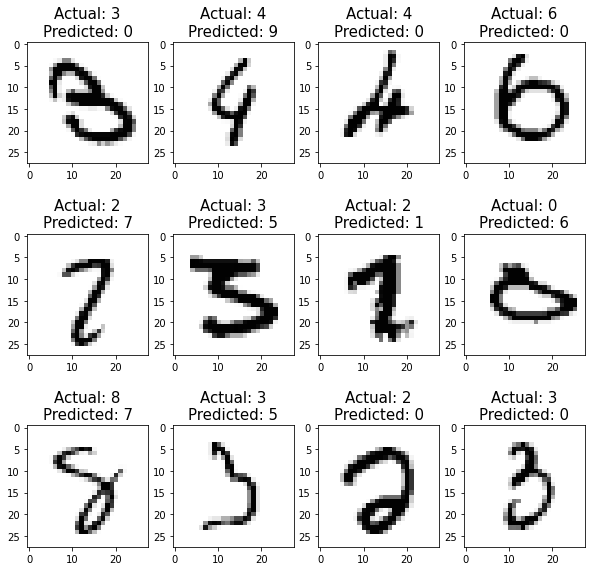

In [48]:
plt.figure(figsize=(10,10))
for index, (image, w_label,r_label) in enumerate(zip(wrong_x[0:12], wrong_y[0:12],correct_y[0:12])):
    plt.subplot(3, 4, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='Greys')
    plt.title('Actual: %i\nPredicted: %i' % (r_label,w_label), fontsize = 15)

# Summary
Convolution Neural Network model is a strong model to handle images data. It can read the handwritten digits with a promising 98.7% accuracy, which is higher than Logistic regression and K-nearest neighbour classification from the previous project.

CNN requires some time to train the model - 45 mins for 60000 of 28*28 pixel images. However, it takes only a short period to predict new images with a built model - 8s for 10000 images.

**Convolution Neural Network vs K-nearest Neighbor**

Both models give high accuracy towards reading handwritten digits. However, CNN requires a short period to predict a new image while KNN would take a huge time to do so. It is because in KNN, every new item needs to compare with all existing data in the dataset. It takes significantly longer time especially when the data size is huge.